## Einführung in Python für Data Analytics
# Abschlussprojekt
### Dozent:
### Dr. Alessandro Bramucci
### Bearbeitung und Präsentation:
### Jonathan Willrich, Gregor Henning, Sebastian Knoche

# Importieren der Bibliotheken

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ttest_ind as my_ttest
import statsmodels.api as sm
from IPython.core.display import HTML as my_html

In [2]:
# Hilfsfunktion zur besseren Darstellung der Ausgaben
    
def pandas_to_html(pandas_obj, titel='Tabelle als HTML'):
    # Konvertiert eine pandas Series oder ein pandas DataFrame in eine HTML-Tabelle.

    # Überprüfen, ob das Objekt eine Series oder ein DataFrame ist
    if isinstance(pandas_obj, pd.Series):
         # Series in DataFrame umwandeln und Spaltennamen ableiten
        tmp_df = pandas_obj.to_frame(name=pandas_obj.name or 'Werte')
        if tmp_df.index.name is None:
            tmp_df.index.name = 'Index'
        html_table = tmp_df.reset_index().to_html(index=False)
    elif isinstance(pandas_obj, pd.DataFrame):
        html_table = pandas_obj.to_html()
    else:
        raise ValueError('Das übergebene Objekt ist weder eine pandas Series noch ein DataFrame.')
    
    # CSS-Style hinzufügen
    css = '''
    <style>
        table {
            margin: 1px 0;
            font-size: 10px;
            text-align: left;
        }
        th, td {
            border: 1px solid #ddd;
            padding: 1px;
        }
        th {
            background-color: #f2f2f2;
            color: black;
        }
    </style>
    '''
    
    return f'''
    {css}
    <h3>{titel}</h3>
    {html_table}
    '''

# Importieren der Daten

```python
# speichere den relativen Pfad und den Dateinamen der Quelle 
file_besucher = 'data/besucher.csv'
file_geo = 'data/geo.txt'
file_kunden = 'data/kunden.csv'

# importiere Daten aus der Quelle in Dataframes
df_besucher = pd.read_csv(file_besucher, sep=";", decimal = ',')
df_geo = pd.read_table(file_geo, decimal = '.')
df_kunden = pd.read_csv(file_kunden, sep=";", decimal = '.')
```

In [3]:
# speichere den relativen Pfad und den Dateinamen der Quelle 
file_besucher = 'data/besucher.csv'
file_geo = 'data/geo.txt'
file_kunden = 'data/kunden.csv'

# importiere Daten aus der Quelle in Dataframes
df_besucher = pd.read_csv(file_besucher, sep=";", decimal = ',')
df_geo = pd.read_table(file_geo, decimal = '.')
df_kunden = pd.read_csv(file_kunden, sep=";", decimal = '.')

# Bereinigen der Daten

## Analyse von df_besucher

In [4]:
html_ausgabe = pandas_to_html(df_besucher.isnull().sum(), 'Anzahl fehlender Werte')
display(my_html(html_ausgabe))

Index,Werte
Alter,0
Einkommen,0
Geschlecht,0
Zeit,0
KundeNr,0


In [5]:
html_ausgabe = pandas_to_html(df_besucher.dtypes, 'Datentypen')
display(my_html(html_ausgabe))

Index,Werte
Alter,int64
Einkommen,float64
Geschlecht,int64
Zeit,float64
KundeNr,object


In [6]:
html_ausgabe = pandas_to_html(df_besucher.head(5), 'Vorschau df_besucher')
display(my_html(html_ausgabe))

Index,Alter,Einkommen,Geschlecht,Zeit,KundeNr
0,30,39919.095335,0,29.0,K1814
1,41,53430.673086,0,27.0,K1544
2,64,73163.216927,0,32.0,K1945
3,41,36761.482581,0,44.0,K1825
4,35,42684.331632,1,33.0,K1144


## Datenmodelierung für df_besucher

```python
# Um das spätere Zusammenführen zu erleichtern, sind folgende Anpassungen hilfreich:

# Füge eine Spalte "Kunde" hinzu, die für Besucher den Wert 0 enthält.
df_besucher['Kunde'] = 0

# Füge die Spalte "Preis" hinzu und setze die Werte auf 0
df_besucher.insert(2, 'Preis', 0)

# Füge die Spalte "Ausreißer" hinzu und setze die Werte auf False
df_besucher.insert(6, 'Ausreißer', False)
```

In [7]:
# Um das spätere Zusammenführen zu erleichtern, sind folgende Anpassungen hilfreich:

# Füge eine Spalte "Kunde" hinzu, die für Besucher den Wert 0 enthält.
df_besucher['Kunde'] = 0

# Füge die Spalte "Preis" hinzu und setze die Werte auf 0
df_besucher.insert(2, 'Preis', 0)

# Füge die Spalte "Ausreißer" hinzu und setze die Werte auf False
df_besucher.insert(6, 'Ausreißer', False)

## Analyse von df_geo

In [8]:
html_ausgabe = pandas_to_html(df_geo.isnull().sum(), 'Anzahl fehlender Werte')
display(my_html(html_ausgabe))

Index,Werte
KundeNr,0
Niederlassung,0


In [9]:
html_ausgabe = pandas_to_html(df_geo.dtypes, 'Datentypen')
display(my_html(html_ausgabe))

Index,Werte
KundeNr,object
Niederlassung,object


In [10]:
html_ausgabe = pandas_to_html(df_geo.head(5), 'Vorschau df_geo')
display(my_html(html_ausgabe))

Index,KundeNr,Niederlassung
0,K0001,Sachsen
1,K0002,NRW
2,K0003,Hessen
3,K0004,Bayern
4,K0005,Bayern


## Datenmodelierung für df_geo

```python
# Ersetze alle Einträge, die "NRW" in der Spalte "Niederlassung" enthalten, mit "Nordrhein-Westfalen"
df_geo['Niederlassung'] = df_geo['Niederlassung'].apply(lambda x: 'Nordrhein-Westfalen' if 'NRW' in x else x)

# Ersetze alle Einträge, die "Berlin" in der Spalte "Niederlassung" enthalten, mit "Berlin"
df_geo['Niederlassung'] = df_geo['Niederlassung'].apply(lambda x: 'Berlin' if 'berlin' in x.lower() else x)
```

In [11]:
# Ersetze alle Einträge, die "NRW" in der Spalte "Niederlassung" enthalten, mit "Nordrhein-Westfalen"
df_geo['Niederlassung'] = df_geo['Niederlassung'].apply(lambda x: 'Nordrhein-Westfalen' if 'NRW' in x else x)

# Ersetze alle Einträge, die "Berlin" in der Spalte "Niederlassung" enthalten, mit "Berlin"
df_geo['Niederlassung'] = df_geo['Niederlassung'].apply(lambda x: 'Berlin' if 'berlin' in x.lower() else x)

## Analyse von df_kunden

In [12]:
html_ausgabe = pandas_to_html(df_kunden.isnull().sum(), 'Anzahl fehlender Werte')
display(my_html(html_ausgabe))

Index,Werte
Alter,0
Einkommen,0
Preis,0
Geschlecht,5
Zeit,0
KundeNr,0


In [13]:
html_ausgabe = pandas_to_html(df_kunden.dtypes, 'Datentypen')
display(my_html(html_ausgabe))

Index,Werte
Alter,int64
Einkommen,float64
Preis,float64
Geschlecht,float64
Zeit,float64
KundeNr,object


In [14]:
html_ausgabe = pandas_to_html(df_kunden.head(5), 'Vorschau df_kunden')
display(my_html(html_ausgabe))

Index,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr
0,64,66894.0,88160.31,1.0,43.0,K0310
1,54,77644.0,103145.70,1.0,40.0,K1042
2,55,44341.0,80565.16,0.0,37.0,K0382
3,49,67271.0,83949.89,0.0,42.0,K0498
4,46,49832.0,93781.58,0.0,41.0,K0552


## Datenmodelierung für df_kunden

```python
# Berechne den Modus für die Werte in der Spalte "Geschlecht"
geschlecht_mode = df_kunden['Geschlecht'].mode()[0]
```

In [15]:
# Berechne den Modus für die Werte in der Spalte "Geschlecht"
geschlecht_mode = df_kunden['Geschlecht'].mode()[0]
print(f'Der Modus für das Geschlecht ist {geschlecht_mode}.')

Der Modus für das Geschlecht ist 1.0.


```python
# Ersetze alle leeren Einträge in der Spalte "Geschlecht" mit dem Modus der Werte in der Spalte "Geschlecht"
df_kunden['Geschlecht'].fillna(geschlecht_mode, inplace=True)

# Konvertiere die Spalte "Geschlecht" in den Integer-Datentyp
df_kunden['Geschlecht'] = df_kunden['Geschlecht'].astype(int)
```

In [16]:
# Ersetze alle leeren Einträge in der Spalte "Geschlecht" mit dem Modus der Werte in der Spalte "Geschlecht".
df_kunden['Geschlecht'].fillna(geschlecht_mode, inplace = True)

# Konvertiere die Spalte "Geschlecht" in den Integer-Datentyp.
df_kunden['Geschlecht'] = df_kunden['Geschlecht'].astype(int)

```python
# Füge eine Spalte "Kunde" hinzu, die für Kunden den Wert 1 enthält.
df_kunden['Kunde'] = 1
```

In [17]:
# Füge eine Spalte "Kunde" hinzu, die für Kunden den Wert 1 enthält.
df_kunden['Kunde'] = 1

## Weitere Datenmodelierung für df_kunden, um Ausreißer zu entfernen

```python
# Entfernen der Ausreißer in der Spalte "Einkommen":
# Berechnung von eink_Q1 (25. Perzentil), eink_Q3 (75. Perzentil) und eink_IQR
eink_Q1 = df_kunden['Einkommen'].quantile(0.25)
eink_Q3 = df_kunden['Einkommen'].quantile(0.75)
eink_IQR = eink_Q3 - eink_Q1

# Berechnung der Ausreißer-Grenzen
eink_untere_grenze = eink_Q1 - 1.5 * eink_IQR
eink_obere_grenze = eink_Q3 + 1.5 * eink_IQR

# Identifizierung von Ausreißern
df_kunden['Ausreißer'] = (df_kunden['Einkommen'] < eink_untere_grenze) | (df_kunden['Einkommen'] > eink_obere_grenze)
```

In [18]:
# Entfernen der Ausreißer in der Spalte "Einkommen":
# Berechnung von eink_Q1 (25. Perzentil), eink_Q3 (75. Perzentil) und eink_IQR
eink_Q1 = df_kunden['Einkommen'].quantile(0.25)
eink_Q3 = df_kunden['Einkommen'].quantile(0.75)
eink_IQR = eink_Q3 - eink_Q1

# Berechnung der Ausreißer-Grenzen
eink_untere_grenze = eink_Q1 - 1.5 * eink_IQR
eink_obere_grenze = eink_Q3 + 1.5 * eink_IQR

# Identifizierung von Ausreißern
df_kunden['Ausreißer'] = (df_kunden['Einkommen'] < eink_untere_grenze) | (df_kunden['Einkommen'] > eink_obere_grenze)

```python
# Berechne den Median für die Werte in der Spalte "Einkommen"
eink_median = df_kunden['Einkommen'].median()
```

In [19]:
# Berechne den Median für die Werte in der Spalte "Einkommen"
eink_median = df_kunden['Einkommen'].median()

print(f'Der Median für das Einkomen ist {eink_median:.2f} EUR.')

Der Median für das Einkomen ist 59013.00 EUR.


```python
# Ersetze Ausreißer mit dem Median der Spalte "Einkommen"
df_kunden.loc[df_kunden['Ausreißer'] == True, 'Einkommen'] = eink_median
```

In [20]:
# Ersetze Ausreißer mit dem Median der Spalte "Einkommen"
df_kunden.loc[df_kunden['Ausreißer'] == True, 'Einkommen'] = eink_median

```python
# Entfernen der Ausreißer in der Spalte "Alter":
# Berechnung von alt_Q1 (25. Perzentil), alt_Q3 (75. Perzentil) und alt_IQR
alt_Q1 = df_kunden['Alter'].quantile(0.25)
alt_Q3 = df_kunden['Alter'].quantile(0.75)
alt_IQR = alt_Q3 - alt_Q1

# Berechnung der Ausreißer-Grenzen
alt_untere_grenze = alt_Q1 - 1.5 * alt_IQR
alt_obere_grenze = alt_Q3 + 1.5 * alt_IQR

# Identifizierung von Ausreißern
df_kunden['Ausreißer'] = (df_kunden['Alter'] < alt_untere_grenze) | (df_kunden['Alter'] > alt_obere_grenze)
```

In [21]:
# Entfernen der Ausreißer in der Spalte "Alter":
# Berechnung von alt_Q1 (25. Perzentil), alt_Q3 (75. Perzentil) und alt_IQR
alt_Q1 = df_kunden['Alter'].quantile(0.25)
alt_Q3 = df_kunden['Alter'].quantile(0.75)
alt_IQR = alt_Q3 - alt_Q1

# Berechnung der Ausreißer-Grenzen
alt_untere_grenze = alt_Q1 - 1.5 * alt_IQR
alt_obere_grenze = alt_Q3 + 1.5 * alt_IQR

# Identifizierung von Ausreißern
df_kunden['Ausreißer'] = (df_kunden['Alter'] < alt_untere_grenze) | (df_kunden['Alter'] > alt_obere_grenze)

```python
# Berechne den Median für die Werte in der Spalte "Alter"
alt_median = df_kunden['Alter'].median()
```

In [22]:
# Berechne den Median für die Werte in der Spalte "Alter"
alt_median = df_kunden['Alter'].median()

print(f'Der Median für das Alter ist {alt_median:.2f} Jahre.')

Der Median für das Alter ist 51.00 Jahre.


```python
# Ersetze Ausreißer mit dem Median der Spalte "Alter"
df_kunden.loc[df_kunden['Ausreißer'] == True, 'Alter'] = alt_median
```

In [23]:
# Ersetze Ausreißer mit dem Median der Spalte "Alter"
df_kunden.loc[df_kunden['Ausreißer'] == True, 'Alter'] = alt_median

## Zusammenführen von df_besucher und df_geo

```python
# Zusammenführen von df_besucher und df_geo basierend auf KundeNr
df_besucher_geo = pd.merge(df_besucher, df_geo, on='KundeNr', how='left')

# Zusammenführen von df_kunden und df_geo basierend auf KundeNr
df_kunden_geo = pd.merge(df_kunden, df_geo, on='KundeNr', how='left')
```

In [24]:
# Zusammenführen von df_besucher und df_geo basierend auf KundeNr
df_besucher_geo = pd.merge(df_besucher, df_geo, on='KundeNr', how='left')

# Zusammenführen von df_kunden und df_geo basierend auf KundeNr
df_kunden_geo = pd.merge(df_kunden, df_geo, on='KundeNr', how='left')

```python
# Zusammenführen von df_besucher_geo und df_kunden_geo zu df_gesamt
df_gesamt = pd.concat([df_besucher_geo, df_kunden_geo], ignore_index=True)

# Bereinigten und zusammengeführten DataFrame df_gesamt als CSV speichern
df_gesamt.to_csv('data/df_gesamt.csv', index=False)
```

In [25]:
# Zusammenführen von df_besucher_geo und df_kunden_geo zu df_gesamt
df_gesamt = pd.concat([df_besucher_geo, df_kunden_geo], ignore_index=True)

# Bereinigten und zusammengeführten DataFrame df_gesamt als CSV speichern
df_gesamt.to_csv('data/df_gesamt.csv', index=False)

# Fragen

### F1: Wie viele Autos wurden verkauft?

```python
# Filtern der Verkäufe
df_verk = df_gesamt[df_gesamt['Kunde'] == True]

# Anzahl der Verkäufe ermitteln
anzahl_verk = len(df_verk)
```

In [26]:
# Filtern der Verkäufe
df_verk = df_gesamt[df_gesamt['Kunde'] == True]

# Anzahl der Verkäufe ermitteln
anzahl_verk = len(df_verk)
print(f'Anzahl der verkauften Autos: {anzahl_verk} Stk.')

Anzahl der verkauften Autos: 1104 Stk.


### F2: Was ist der Höchst-, Mindest- und Durchschnittspreis der verkauften Autos?

```python
# Höchster Verkaufspreis
max_preis = df_verk['Preis'].max()

# Niedrigster Verkaufspreis
min_preis = df_verk['Preis'].min()

# Durchschnittspreis
mittel_preis = df_verk['Preis'].mean()
```

In [27]:
# Höchster Verkaufspreis
max_preis = df_verk['Preis'].max()

# Niedrigster Verkaufspreis
min_preis = df_verk['Preis'].min()

# Durchschnittspreis
mittel_preis = df_verk['Preis'].mean()

# Ausgabe der Ergebnisse
print(f'''Höchster Verkaufspreis:   {max_preis:.2f} EUR
Niedrigster Verkaufspreis: {min_preis:.2f} EUR
Durchschnittspreis:        {mittel_preis:.2f} EUR''')

Höchster Verkaufspreis:   165482.31 EUR
Niedrigster Verkaufspreis: 21471.65 EUR
Durchschnittspreis:        88975.20 EUR


### F3: Wie hoch war der Gesamtumsatz?

```python
# Gesamtumsatz
gesamtumsatz = df_verk['Preis'].sum()
```

In [28]:
# Gesamtumsatz
gesamtumsatz = df_verk['Preis'].sum()
print(f'Gesamtumsatz: {gesamtumsatz:.2f} EUR')

Gesamtumsatz: 98228619.38 EUR


### F4: Wie viele Autos wurden pro Bundesland verkauft?

```python
# Liste der Bundesländer mit der Anzahl der Verkäufe
anzahl_verk_niederl = df_verk['Niederlassung'].value_counts()

# Alphabetisch sortieren
anzahl_verk_niederl = anzahl_verk_niederl.sort_index()
```

In [29]:
# Liste der Bundesländer mit der Anzahl der Verkäufe
anz_verk_niederl = df_verk['Niederlassung'].value_counts()

# Alphabetisch sortieren
anz_verk_niederl = anz_verk_niederl.sort_index()

# Ausgabe
html_ausgabe = pandas_to_html(anz_verk_niederl, 'Anzahl der Verkäufe pro Bundesland in Stück')
display(my_html(html_ausgabe))

Niederlassung,count
Baden-Württemberg,205
Bayern,188
Berlin,126
Brandenburg,37
Düsseldorf,1
Hamburg,43
Hessen,96
Niedersachsen,96
Nordrhein-Westfalen,174
Sachsen,89


### F5: Wie hoch war der durchschnittliche Umsatz pro Bundesland?

```python
# Durchschnittlicher Umsatz pro Bundesland
umsatz_pro_niederl = df_verk.groupby('Niederlassung')['Preis'].mean()

# Runden auf zwei Nachkommastellen
umsatz_pro_niederl = umsatz_pro_niederl.round(2)
```

In [30]:
# Durchschnittlicher Umsatz pro Bundesland
umsatz_pro_niederl = df_verk.groupby('Niederlassung')['Preis'].mean()

# Runden auf zwei Nachkommastellen
umsatz_pro_niederl = umsatz_pro_niederl.round(2)

# Sortieren nach dem durchschnittlichem Umsatz (absteigend)
#umsatz_pro_niederl = umsatz_pro_niederl.sort_values(ascending=False)

# Ausgabe
html_ausgabe = pandas_to_html(umsatz_pro_niederl, 'Durchschnittlicher Umsatz pro Bundesland in EUR')
display(my_html(html_ausgabe))

Niederlassung,Preis
Baden-Württemberg,90969.56
Bayern,89344.31
Berlin,89584.98
Brandenburg,86673.64
Düsseldorf,120215.50
Hamburg,85549.50
Hessen,85864.93
Niedersachsen,87963.31
Nordrhein-Westfalen,88451.76
Sachsen,89455.08


### F6: In welchem Bundesland wurde das teuerste Auto verkauft?

```python
# Ermittlung der höchsten Verkaufspreise für jedes Bundesland
max_pro_niederl = df_verk.groupby('Niederlassung')['Preis'].max()

# Finden des Bundeslandes mit dem höchsten Verkaufspreis
max_niederl = max_pro_niederl.idxmax()
max_preis = max_pro_niederl.max()
```

In [31]:
# Ermittlung der höchsten Verkaufspreise für jedes Bundesland
max_pro_niederl = df_verk.groupby('Niederlassung')['Preis'].max()

# Finden des Bundeslandes mit dem höchsten Verkaufspreis
max_niederl = max_pro_niederl.idxmax()
max_preis = max_pro_niederl.max()

print(f'Das Bundesland mit dem höchsten Verkaufspreis ist {max_niederl} mit einem Preis von {max_preis} EUR.')

Das Bundesland mit dem höchsten Verkaufspreis ist Niedersachsen mit einem Preis von 165482.31 EUR.


### F7: Haben mehr Frauen oder mehr Männer unsere Autos gekauft?

```python
# Ermittlung der Anzahl der Verkäufe pro Geschlecht
verk_pro_geschl = df_verk.groupby('Geschlecht')['Geschlecht'].count()

# Finden des Geschlechts mit den meisten Käufen
max_geschl = 'Männern' if verk_pro_geschl.idxmax() else 'Frauen'
max_verk = verk_pro_geschl.max()
```

In [32]:
# Ermittlung der Anzahl der Verkäufe pro Geschlecht
verk_pro_geschl = df_verk.groupby('Geschlecht')['Geschlecht'].count()

# Finden des Geschlechts mit den meisten Käufen
max_geschl = 'Männern' if verk_pro_geschl.idxmax() else 'Frauen'
max_verk = verk_pro_geschl.max()

print(f'''Die meisten Autos wurden von {max_geschl} gekauft,
sie haben {max_verk} Autos gekauft.''')

Die meisten Autos wurden von Männern gekauft,
sie haben 706 Autos gekauft.


### F8: Wie hoch ist das Durchschnittsalter unserer Kunden? Wie hoch ist das Durchschnittsalter unserer Besucher?

```python
# Berechnung des Durchschnittsalters für Kunden und Besucher
mittel_alt_kunden = df_gesamt[df_gesamt['Kunde'] == 1]['Alter'].mean()
mittel_alt_besucher = df_gesamt[df_gesamt['Kunde'] == 0]['Alter'].mean()
```

In [33]:
# Berechnung des Durchschnittsalters für Kunden und Besucher
mittel_alt_kunden = df_gesamt[df_gesamt['Kunde'] == 1]['Alter'].mean()
mittel_alt_besucher = df_gesamt[df_gesamt['Kunde'] == 0]['Alter'].mean()

print(f'''Das Durchschnittsalter der Kunden ist {mittel_alt_kunden:.2f} Jahre.
Das Durchschnittsalter der Besucher ist {mittel_alt_besucher:.2f} Jahre.''')

Das Durchschnittsalter der Kunden ist 50.38 Jahre.
Das Durchschnittsalter der Besucher ist 49.88 Jahre.


### F9: Wie hoch ist das Durchschnittseinkommen unserer Kunden? Wie hoch ist das Durchschnittseinkommen unserer Besucher?

```python
# Filter nach Einkommen der Kunden
eink_kunden = df_gesamt[df_gesamt['Kunde'] == 1]['Einkommen']
# Filter nach Einkommen der Besucher
eink_besucher = df_gesamt[df_gesamt['Kunde'] == 0]['Einkommen']

# Berechnung der Durchschnittseinkommen für Kunden und Besucher
mittel_eink_kunden = eink_kunden.mean()
mittel_eink_besucher = eink_besucher.mean()
```

In [34]:
# Filter nach Einkommen der Kunden
eink_kunden = df_gesamt[df_gesamt['Kunde'] == 1]['Einkommen']
# Filter nach Einkommen der Besucher
eink_besucher = df_gesamt[df_gesamt['Kunde'] == 0]['Einkommen']

# Berechnung der Durchschnittseinkommen für Kunden und Besucher
mittel_eink_kunden = eink_kunden.mean()
mittel_eink_besucher = eink_besucher.mean()

print(f'''Das Durchschnittseinkommen der Kunden ist {mittel_eink_kunden:.2f} EUR.
Das Durchschnittseinkommen der Besucher ist {mittel_eink_besucher:.2f} EUR.''')

Das Durchschnittseinkommen der Kunden ist 58850.91 EUR.
Das Durchschnittseinkommen der Besucher ist 59367.94 EUR.


### F10: Bestimmen Sie, ob es einen statistisch signifikanten Unterschied zwischen dem Durchschnittseinkommen der Kunden und dem Durchschnittseinkommen der Besucher gibt.
#### Sie müssen einen Zweistichproben-t-Test durchführen. Beginnen Sie mit der Aufstellung der Null- und Alternativhypothese. Verwenden Sie ein Signifikanzniveau (α) von 5%. Nehmen Sie an, dass die Varianzen der beiden Gruppen gleich sind.

Nullhypothese (H0​): Es gibt keinen Unterschied zwischen dem Durchschnittseinkommen der Kunden und der Besucher. (μKunden=μBesucher)

Alternativhypothese (H1​): Es gibt einen Unterschied zwischen dem Durchschnittseinkommen der Kunden und der Besucher. (μKunden≠μBesucher​)

Wir verwenden ein Signifikanzniveau (α) von 5%.

```python
# Zweistichproben-t-Test durchführen, unter der Annahme, dass die Varianzen gleich sind (usevar='pooled')
t_stat, p_value, df = my_ttest(eink_kunden, eink_besucher, usevar='pooled')

# Entscheidung basierend auf dem p-Wert
alpha = 0.05
stat_signifikant = p_value < alpha
```

In [35]:
# Zweistichproben-t-Test durchführen, unter der Annahme, dass die Varianzen gleich sind (usevar='pooled')
t_stat, p_value, df = my_ttest(eink_kunden, eink_besucher, usevar='pooled')

print(f'''Ergebnisse des Zweistichproben-t-Tests:
t-Statistik: {t_stat:.2f}
p-Wert: {p_value:.5f}\n''')

# Entscheidung basierend auf dem p-Wert
alpha = 0.05
stat_signifikant = p_value < alpha
if stat_signifikant:
    print('''Es gibt einen statistisch signifikanten Unterschied
zwischen dem Durchschnittseinkommen der Kunden und dem der Besucher.''')
else:
    print('''Es gibt keinen statistisch signifikanten Unterschied
zwischen dem Durchschnittseinkommen der Kunden und dem der Besucher.''')

Ergebnisse des Zweistichproben-t-Tests:
t-Statistik: -0.70
p-Wert: 0.48183

Es gibt keinen statistisch signifikanten Unterschied
zwischen dem Durchschnittseinkommen der Kunden und dem der Besucher.


### F11: Wie hoch ist die Korrelation (Pearson-Korrelation) zwischen den Variablen Alter, Einkommen, Preis und Zeit?
#### Berechnen Sie die Korrelation nur für Kunden.

```python
# Berechnung der Pearson-Korrelation (nur für Kunden)
r = df_verk[['Alter', 'Einkommen', 'Preis', 'Zeit']].corr(method='pearson')
```

In [36]:
# Berechnung der Pearson-Korrelation (nur für Kunden)
r = df_verk[['Alter', 'Einkommen', 'Preis', 'Zeit']].corr(method='pearson')

# HTML Ausgabe
html_ausgabe = pandas_to_html(r, 'Korrelation zwischen den Variablen Alter, Einkommen, Preis und Zeit für Kunden')
display(my_html(html_ausgabe))

Index,Alter,Einkommen,Preis,Zeit
Index,,,,
Alter,1.000000,0.760632,0.780478,0.588912
Einkommen,0.760632,1.000000,0.891739,0.775427
Preis,0.780478,0.891739,1.000000,0.707778
Zeit,0.588912,0.775427,0.707778,1.000000


### F12: Testen Sie grafisch mit Hilfe eines qq-Plots, ob die Variable Zeit approximativ normalverteilt ist.
#### Kunden und Besucher zusammen.

```python
# Daten für den QQ-Plot
zeit = df_gesamt['Zeit']

# QQ-Plot erstellen
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(zeit, line='s', ax=ax)
ax.set_title('Variable Zeit in Relation zur Standardnormalverteilung')

# Speichern des QQ-Plots als Bild
plt.savefig('images/qq_plot_zeit.png')
```

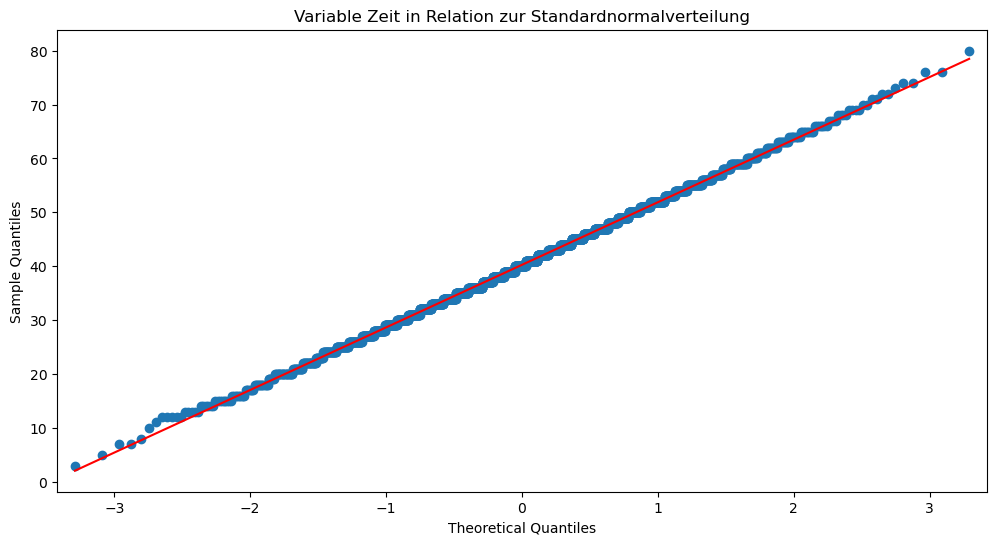

In [37]:
# Daten für den QQ-Plot
zeit = df_gesamt['Zeit']

# QQ-Plot erstellen
fig, ax = plt.subplots(figsize=(12, 6))  # Größe des Plots festlegen
sm.qqplot(zeit, line='s', ax=ax)  # QQ-Plot erstellen, 's' für Standardnormalverteilung
ax.set_title('Variable Zeit in Relation zur Standardnormalverteilung')  # Titel des Plots
#ax.set_xlabel('x')  # Beschriftung der x-Achse
#ax.set_ylabel('y')  # Beschriftung der y-Achse

# Speichern des QQ-Plots als Bild
plt.savefig('images/qq_plot_zeit.png')
plt.show()

### F13: Wie viele Kunden haben keinen Bankkredit aufgenommen, um das Auto zu kaufen? Die Kundenabteilung hat vergessen, diese Informationen zu erfassen. Wir können davon ausgehen, dass die Kunden mit einem Jahreseinkommen höher als der Autopreis keinen Kredit aufgenommen haben.

```python
# Kunden ohne Bankkredit berechnen
kunden_ohne_kredit = df_verk[df_verk['Einkommen'] > df_verk['Preis']]
anz_kunden_ohne_kredit = len(kunden_ohne_kredit)
```

In [38]:
# Kunden ohne Bankkredit berechnen
kunden_ohne_kredit = df_verk[df_verk['Einkommen'] > df_verk['Preis']]
anz_kunden_ohne_kredit = len(kunden_ohne_kredit)
print(f'Die Anzahl der Kunden, die keinen Bankkredit aufgenommen haben ist {anz_kunden_ohne_kredit}.')

Die Anzahl der Kunden, die keinen Bankkredit aufgenommen haben ist 5.


### F14: Welche sozioökonomischen Merkmale beeinflussen den Kaufpreis? Wählen Sie die geeigneten unabhängigen Variablen aus und schätzen Sie eine Regression unter Verwendung der geeigneten Methode.
#### Verwenden Sie die Bibliothek statsmodel und nicht sklearn.

```python
# Unabhängige Variablen auswählen
X_ml = df_verk[['Alter', 'Einkommen', 'Geschlecht']]
X_ml = sm.add_constant(X_ml)  # Konstante hinzufügen

# Abhängige Variable
y_ml = df_verk['Preis']

# Regression schätzen
model = sm.OLS(y_ml, X_ml).fit()
```

In [39]:
# Unabhängige Variablen auswählen
X_ml = df_verk[['Alter', 'Einkommen', 'Geschlecht']]
X_ml = sm.add_constant(X_ml)  # Konstante hinzufügen

# Abhängige Variable
y_ml = df_verk['Preis']

# Regression schätzen
model = sm.OLS(y_ml, X_ml).fit()

# Summary in HTML rendern und anzeigen
html_summary = model.summary().as_html()
display(my_html(html_summary))

### F15: Prognostizieren Sie den Kaufpreis eines unserer Autos für einen männlichen Kunden im Alter von 32 Jahren mit einem Einkommen von 30.000 Euro. Prognostizieren Sie den Kaufpreis eines unserer Autos für einen männlichen Kunden im Alter von 51 Jahren und mit einem Einkommen von 54.000 Euro.

```python
# Prognose 1 (Preis): Alter 32, Geschlecht 1, Einkommen 30000
X_predict1_ml = pd.DataFrame({'Alter': [32], 'Einkommen': [30000], 'Geschlecht': [1]})
X_predict1_ml = sm.add_constant(X_predict1_ml, has_constant='add')
prediction1_ml = model.predict(X_predict1_ml)

# Prognose 2 (Preis): Alter 51, Geschlecht 1, Einkommen 54000
X_predict2_ml = pd.DataFrame({'Alter': [51], 'Einkommen': [54000], 'Geschlecht': [1]})
X_predict2_ml = sm.add_constant(X_predict2_ml, has_constant='add')
prediction2_ml = model.predict(X_predict2_ml)
```

In [40]:
# Prognose 1 (Preis): Alter 32, Geschlecht 1, Einkommen 30000
X_predict1_ml = pd.DataFrame({'Alter': [32], 'Einkommen': [30000], 'Geschlecht': [1]})
X_predict1_ml = sm.add_constant(X_predict1_ml, has_constant='add')
prediction1_ml = model.predict(X_predict1_ml)
print(f'''Für einen männlichen Kunden im Alter von 32 Jahren, mit einem Einkommen von 30.000 Euro,
beträgt der prognostizierte Kaufpreis eines Autos {prediction1_ml.iloc[0]:.2f} EUR\n''')

# Prognose 2 (Preis): Alter 51, Geschlecht 1, Einkommen 54000
X_predict2_ml = pd.DataFrame({'Alter': [51], 'Einkommen': [54000], 'Geschlecht': [1]})
X_predict2_ml = sm.add_constant(X_predict2_ml, has_constant='add')
prediction2_ml = model.predict(X_predict2_ml)
print(f'''Für einen männlichen Kunden im Alter von 51 Jahren, mit einem Einkommen von 54.000 Euro,
beträgt der prognostizierte Kaufpreis eines Autos {prediction2_ml.iloc[0]:.2f} EUR''')

Für einen männlichen Kunden im Alter von 32 Jahren, mit einem Einkommen von 30.000 Euro,
beträgt der prognostizierte Kaufpreis eines Autos 50345.86 EUR

Für einen männlichen Kunden im Alter von 51 Jahren, mit einem Einkommen von 54.000 Euro,
beträgt der prognostizierte Kaufpreis eines Autos 84999.83 EUR


### F16: In Bezug auf die vorherige Frage: Welche Variable beeinflusst den Preis des Autos am meisten? Mit anderen Worten: Die von Ihnen geschätzten Regressionskoeffizienten müssen direkt vergleichbar sein. Wie sollen die Daten transformiert werden?
#### Sie müssen die standardisierten Koeffizienten schätzen.

```python
# Daten standardisieren
df_verk_stand = df_verk.copy()
df_verk_x = df_verk[['Alter', 'Einkommen', 'Geschlecht']]
df_verk_mu = df_verk[['Alter', 'Einkommen', 'Geschlecht']].mean()
df_verk_sd = df_verk[['Alter', 'Einkommen', 'Geschlecht']].std()
df_verk_stand[['Alter', 'Einkommen', 'Geschlecht']] = (df_verk_x - df_verk_mu) / df_verk_sd

# Unabhängige Variablen auswählen
X_stand = df_verk_stand[['Alter', 'Einkommen', 'Geschlecht']]
X_stand = sm.add_constant(X_stand)  # Konstante hinzufügen

# Regression mit standardisierten Variablen schätzen
model_stand = sm.OLS(y_ml, X_stand).fit()
```

In [41]:
# Daten standardisieren
df_verk_stand = df_verk.copy()
df_verk_x = df_verk[['Alter', 'Einkommen', 'Geschlecht']]
df_verk_mu = df_verk[['Alter', 'Einkommen', 'Geschlecht']].mean()
df_verk_sd = df_verk[['Alter', 'Einkommen', 'Geschlecht']].std()
df_verk_stand[['Alter', 'Einkommen', 'Geschlecht']] = (df_verk_x - df_verk_mu) / df_verk_sd

# Unabhängige Variablen auswählen
X_stand = df_verk_stand[['Alter', 'Einkommen', 'Geschlecht']]
X_stand = sm.add_constant(X_stand)  # Konstante hinzufügen

# Regression mit standardisierten Variablen schätzen
model_stand = sm.OLS(y_ml, X_stand).fit()

# Summary in HTML rendern und anzeigen
html_summary = model_stand.summary().as_html()
display(my_html(html_summary))

### F17: Schätzen Sie eine Regression, die die Wahrscheinlichkeit des Kaufs eines Autos ermittelt. Verwenden Sie die entsprechende Methode.
#### Sie müssen eine logistische Regression durchführen.

```python
# Logistische Regression
y_lg = df_gesamt['Kunde']
X_lg = df_gesamt[['Alter', 'Einkommen', 'Geschlecht', 'Zeit']]
X_lg = sm.add_constant(X_lg)

model_lg = sm.Logit(y_lg, X_lg).fit()
print(model_lg.summary())
```

In [42]:
# Logistische Regression
y_lg = df_gesamt['Kunde']
X_lg = df_gesamt[['Alter', 'Einkommen', 'Geschlecht', 'Zeit']]
X_lg = sm.add_constant(X_lg)

model_lg = sm.Logit(y_lg, X_lg).fit()

# Summary in HTML rendern und anzeigen
html_summary = model_lg.summary().as_html()
display(my_html(html_summary))

Optimization terminated successfully.
         Current function value: 0.578825
         Iterations 6


### F18: Wie hoch ist die Wahrscheinlichkeit, dass ein 32-jähriger männlicher Kunde mit einem Einkommen von 30.000 Euro, der das Auto 30 Minuten lang getestet hat, eines unserer Modelle kauft? Wie hoch ist die Wahrscheinlichkeit, dass ein 51-jähriger männlicher Kunde mit einem Einkommen von 54.000 Euro, der das Auto 45 Minuten lang getestet hat, eines unserer Modelle kauft?

```python
# Prognose 1 (Kaufwahrscheinlichkeit) Alter 32, Einkommen 30000, Geschlecht 1, Zeit 30
X_predict1_lg = pd.DataFrame({'Alter': [32], 'Einkommen': [30000], 'Geschlecht': [1], 'Zeit': [30]})
X_predict1_lg = sm.add_constant(X_predict1_lg, has_constant='add')
prediction1_lg = model_lg.predict(X_predict1_lg)

# Prognose 2 (Kaufwahrscheinlichkeit) Alter 51, Einkommen 54000, Geschlecht 1, Zeit 45
X_predict2_lg = pd.DataFrame({'Alter': [51], 'Einkommen': [54000], 'Geschlecht': [1], 'Zeit': [45]})
X_predict2_lg = sm.add_constant(X_predict2_lg, has_constant='add')
prediction2_lg = model_lg.predict(X_predict2_lg)
```

In [43]:
# Prognose 1 (Kaufwahrscheinlichkeit) Alter 32, Einkommen 30000, Geschlecht 1, Zeit 30
X_predict1_lg = pd.DataFrame({'Alter': [32], 'Einkommen': [30000], 'Geschlecht': [1], 'Zeit': [30]})
X_predict1_lg = sm.add_constant(X_predict1_lg, has_constant='add')
prediction1_lg = model_lg.predict(X_predict1_lg)
print(f'''Für einen männlichen Kunden im Alter von 32 Jahren, mit einem Einkommen von 30.000 Euro und einer Testzeit von 30 Minuten,
beträgt die prognostizierte Kaufwahrscheinlichkeit eines Autos {100*prediction1_lg.iloc[0]:.2f} Prozent.\n''')

# Prognose 2 (Kaufwahrscheinlichkeit) Alter 51, Einkommen 54000, Geschlecht 1, Zeit 45
X_predict2_lg = pd.DataFrame({'Alter': [51], 'Einkommen': [54000], 'Geschlecht': [1], 'Zeit': [45]})
X_predict2_lg = sm.add_constant(X_predict2_lg, has_constant='add')
prediction2_lg = model_lg.predict(X_predict2_lg)
print(f'''Für einen männlichen Kunden im Alter von 51 Jahren, mit einem Einkommen von 54.000 Euro und einer Testzeit von 45 Minuten,
beträgt die prognostizierte Kaufwahrscheinlichkeit eines Autos {100*prediction2_lg.iloc[0]:.2f} Prozent.''')

Für einen männlichen Kunden im Alter von 32 Jahren, mit einem Einkommen von 30.000 Euro und einer Testzeit von 30 Minuten,
beträgt die prognostizierte Kaufwahrscheinlichkeit eines Autos 54.65 Prozent.

Für einen männlichen Kunden im Alter von 51 Jahren, mit einem Einkommen von 54.000 Euro und einer Testzeit von 45 Minuten,
beträgt die prognostizierte Kaufwahrscheinlichkeit eines Autos 74.04 Prozent.


# Probleme

## F19: Auf welche Probleme sind Sie bei der Zusammenführung des Datensatzes gestoßen? Stellen Sie die Operationen vor, die Sie zum Zusammenführen und Bereinigen der Daten durchgeführt haben.

### Es gab leere Einträge beim Geschlecht im Datensatz Kunden.csv

```python
# Identifizieren der leeren Eintröge im Datensatz Kunden.csv
html_ausgabe = pandas_to_html(df_kunden.isnull().sum(), 'Anzahl fehlender Werte')
display(my_html(html_ausgabe))

# Ersetze alle leeren Einträge in der Spalte "Geschlecht" mit dem Modus der Werte in der Spalte "Geschlecht"
df_kunden['Geschlecht'].fillna(geschlecht_mode, inplace=True)
```

### Die Daten für das Geschlecht im Datensatz Kunden.csv wurde als Datentyp integer angegeben¶

``` python
# Konvertiere die Spalte "Geschlecht" in den Integer-Datentyp
df_kunden['Geschlecht'] = df_kunden['Geschlecht'].astype(int).')
```

### Es gab mehrere Ausreißer im Datensatz Kunden beim Einkommen

```python
# Berechne den Median für die Werte in der Spalte "Einkommen"
eink_median = df_kunden['Einkommen'].median()

# Entfernen der Ausreißer in der Spalte "Alter":
# Berechnung von alt_Q1 (25. Perzentil), alt_Q3 (75. Perzentil) und alt_IQR
alt_Q1 = df_kunden['Alter'].quantile(0.25)
alt_Q3 = df_kunden['Alter'].quantile(0.75)
alt_IQR = alt_Q3 - alt_Q1

# Berechnung der Ausreißer-Grenzen
alt_untere_grenze = alt_Q1 - 1.5 * alt_IQR
alt_obere_grenze = alt_Q3 + 1.5 * alt_IQR

# Identifizierung von Ausreißern
df_kunden['Ausreißer'] = (df_kunden['Alter'] < alt_untere_grenze) | (df_kunden['Alter'] > alt_ob

# Ersetze Ausreißer mit dem Median der Spalte "Einkommen"
df_kunden.loc[df_kunden['Ausreißer'] == True, 'Einkommen'] = eink_median
ere_grenze)

### Es gab Ausreißer beim Alter der Kunden im Datensatz Kunden.csv

```python
# Ersetze Ausreißer mit dem Median der Spalte "Alter"
df_kunden.loc[df_kunden['Ausreißer'] == True, 'Alter'] = alt_median

### Es gab unterschiedliche Bezeichnungen in dem Datensatz geo.txt für die Bundesländer Nordrheinwest-Westfahlen und Berlin

```python
# Ersetze alle Einträge, die "NRW" in der Spalte "Niederlassung" enthalten, mit "Nordrhein-Westfalen"
df_geo['Niederlassung'] = df_geo['Niederlassung'].apply(lambda x: 'Nordrhein-Westfalen' if 'NRW' in x else x)

# Ersetze alle Einträge, die "Berlin" in der Spalte "Niederlassung" enthalten, mit "Berlin"
df_geo['Niederlassung'] = df_geo['Niederlassung'].apply(lambda x: 'Berlin' if 'berlin' in x.lower() else x)

# Vorschläge

### F20. Welche Vorschläge würden Sie der Kundenabteilung für die Umfrage im nächsten Jahr machen? Welche zusätzlichen Informationen sollten gesammelt werden? Formulieren Sie zwei Vorschläge.

### Vorgehensweise:


- Sauberkeit der Daten beachten, Fehlerquellen verhinden
- Eindeutige Bezeichnungen für Niederlassung verwenden


### Vorschlag 1:


- Welche Informationsquellen wurden für den Kauf genutzt (Empfehlungen von Freunde/Familie, Soziale Medien, Werbung (TV, Radio, Internet, Printmedien, ...))


### Vorschlag 2:

- Hauptgründe für den Fahrzeugkauf (z.B. Preis, Marke, Ausstattung, Qualität, Umweltaspekte, ...)

# Vielen Dank für Ihre Aufmerksamkeit 🐍 